# Amey Narayan Tendolkar


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#libraries imported

In [35]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",sep=',',encoding='ISO-8859-1')
# data loaded

In [36]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [37]:
data.shape
#here u can see multiple columns so deleting few columns

(181691, 135)

In [38]:
data=data[["iyear","imonth",'extended','iday','country_txt','provstate','region_txt','nwound','nkill','attacktype1_txt','targtype1','latitude','longitude','motive','weaptype1_txt','city','gname']]

In [39]:
data.shape

(181691, 17)

In [40]:
data.isnull().sum()

iyear                   0
imonth                  0
extended                0
iday                    0
country_txt             0
provstate             421
region_txt              0
nwound              16311
nkill               10313
attacktype1_txt         0
targtype1               0
latitude             4556
longitude            4557
motive             131130
weaptype1_txt           0
city                  434
gname                   0
dtype: int64

In [43]:
#column names are little complex
data.rename(columns={"iyear":"year","imonth":"month","iday":"day","extended":"Extended","country_txt":"Country","provstate":"State",
                    "region_txt":"Region","nwound":"Wounded","nkill":"Killed","attacktype1_txt":"AttackType","targettype1":"Targettype",
                    "Weaptype1_txt":"Weaptype","gname":"Group"},inplace=True)

In [44]:
data.isnull().sum()
#alot of null values but currently we are not filling them or deleting them using as it is as data is very sensitive

year                  0
month                 0
Extended              0
day                   0
Country               0
State               421
Region                0
Wounded           16311
Killed            10313
AttackType            0
targtype1             0
latitude           4556
longitude          4557
motive           131130
weaptype1_txt         0
city                434
Group                 0
dtype: int64

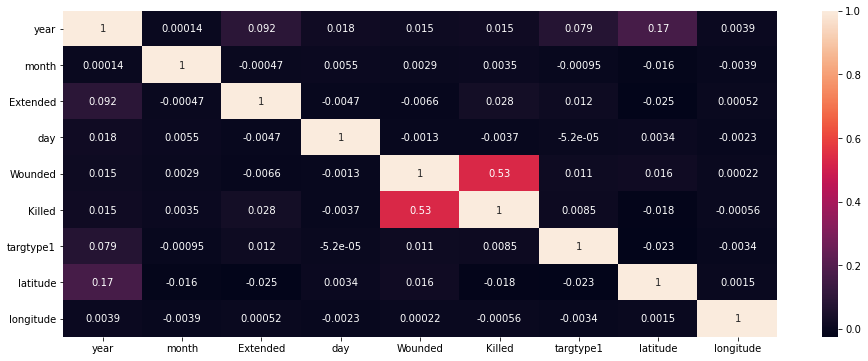

In [45]:
m=data.corr()
plt.figure(figsize=(16,6))
sns.heatmap(m,annot=True);
#here we check the correlation of columns


In [71]:
#now lets find the top 10 countries with max attacks
m=data.groupby("Country")["Country"].count().sort_values(ascending=False)
m

Country
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Antigua and Barbuda        1
Andorra                    1
New Hebrides               1
Vatican City               1
Falkland Islands           1
Name: Country, Length: 205, dtype: int64

In [56]:
m.head(10)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

most terrorist attacks happended in iraq

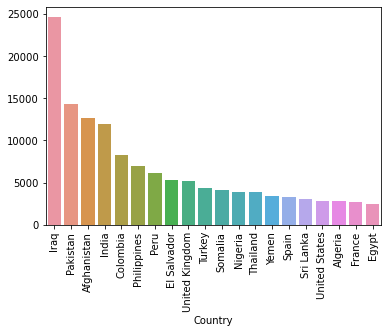

In [87]:
sns.barplot(m[:20].index,m[:20].values);
plt.xticks(rotation=90);

In [90]:
#now lets find states with more number of attacks
m=data.groupby("State")["State"].count().sort_values(ascending=False)

In [92]:
m[:10]


State
Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

In [97]:
#Baghdad is the state where max number of terror attack happend

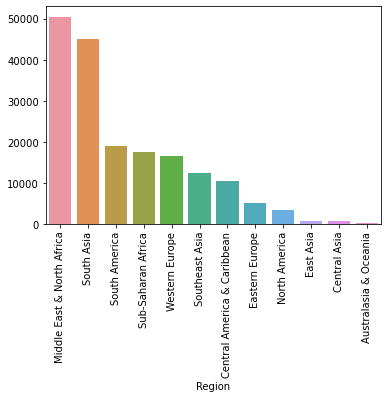

In [98]:
sns.barplot(m[:20].index,m[:20].values);
plt.xticks(rotation=90);

In [99]:
#now calculating most regions with attack
m=data.groupby("Region")["Region"].count().sort_values(ascending=False)

In [96]:
m
#here we can see most attacks happed at middle east & north africa followed by south asia


Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

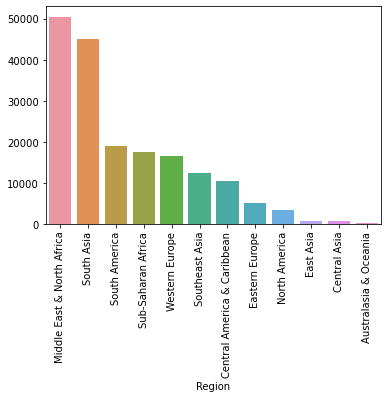

In [100]:
sns.barplot(m[:20].index,m[:20].values);
plt.xticks(rotation=90);

In [101]:
#now checking for cities
m=data.groupby("city")["city"].count().sort_values(ascending=False)

In [103]:
m[:20]
#there are unknown values except that baghdad is the most attacked city


city
Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: city, dtype: int64

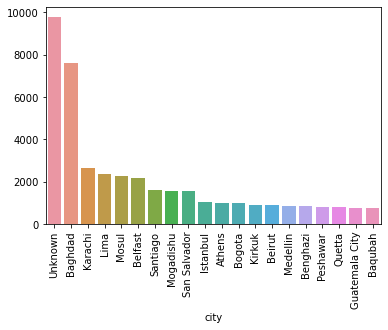

In [104]:
sns.barplot(m[:20].index,m[:20].values);
plt.xticks(rotation=90);

In [109]:
#now lets check in which years most terrirst activities happended
m=data.groupby("year")["year"].count().sort_values(ascending=False)

In [110]:
m[:10]
#here you can see most attacks are done in 2014

year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: year, dtype: int64

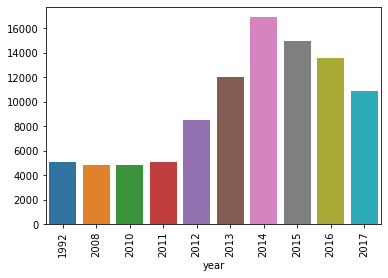

In [114]:
sns.barplot(m[:10].index,m[:10].values);
plt.xticks(rotation=90);

In [117]:
#now lets check most attack types
m=data.groupby("AttackType")["AttackType"].count().sort_values(ascending=False)

In [118]:
m[:10]
#here we can see most attacks are done by bombing or explosion


AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

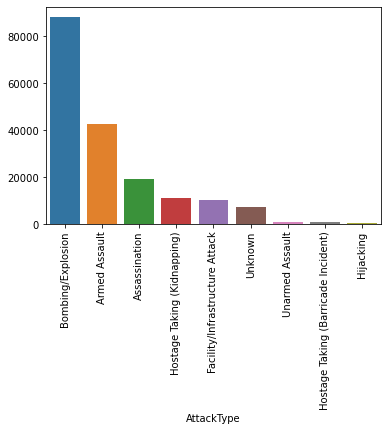

In [119]:
sns.barplot(m[:20].index,m[:20].values);
plt.xticks(rotation=90);

In [120]:
#now lets check most active group of terrorist
m=data.groupby("Group")["Group"].count().sort_values(ascending=False)

In [122]:
m[:10]
#here we can see Taliban is most active group


Group
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

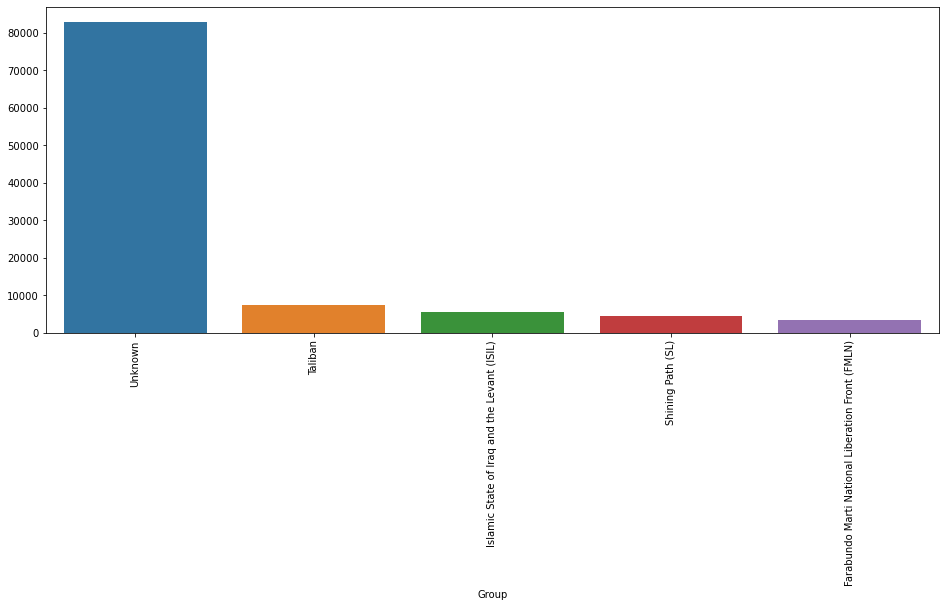

In [126]:
plt.figure(figsize=(16,6))
sns.barplot(m[:5].index,m[:5].values);
plt.xticks(rotation=90);

In [130]:
#lets check most used weapons
m=data.groupby("weaptype1_txt")["weaptype1_txt"].count().sort_values(ascending=False)

In [132]:
m[:10]
#explosives are used most

weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weaptype1_txt, dtype: int64

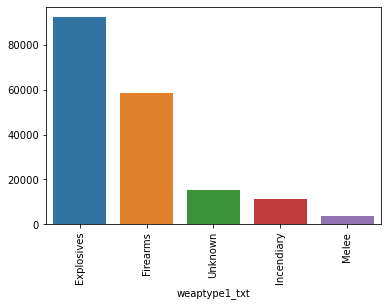

In [133]:
sns.barplot(m[:5].index,m[:5].values);
plt.xticks(rotation=90);

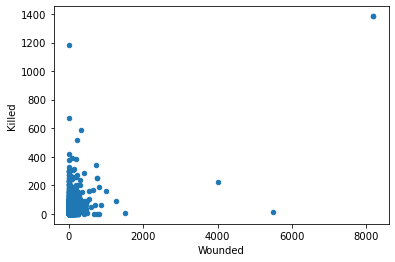

In [138]:
data.plot(kind="scatter",x='Wounded',y="Killed")

# insights drawn
1) most used weapon is explosives so there is need of security against it in crowded places
